#### Predicting Sentiment From Real Amazon Echo Customer Reviews

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 01:

In [2]:
amazon_df=pd.read_csv("amazon_reviews.csv")
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
amazon_df.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
amazon_df.shape

(3150, 5)

In [6]:
amazon_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [7]:
amazon_df=amazon_df.drop(["rating", "date","variation"], axis=1)
amazon_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


#### STEP 02:

<AxesSubplot:xlabel='feedback', ylabel='count'>

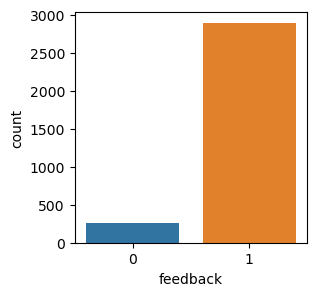

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(x=amazon_df["feedback"], label="count") 

In [9]:
amazon_df["length"]=amazon_df["verified_reviews"].apply(len)
amazon_df.head()

,verified_reviews,feedback,length
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"Sometimes while playing a game, you can answer...",1,195
3,I have had a lot of fun with this thing. My 4 ...,1,172
4,Music,1,5


In [10]:
amazon_df.describe()

,feedback,length
count,3150.000000,3150.000000
mean,0.918413,132.049524
std,0.273778,182.099952
min,0.000000,1.000000
25%,1.000000,30.000000
50%,1.000000,74.000000
75%,1.000000,165.000000
max,1.000000,2851.000000


#### STEP 03: 

In [11]:
amazon_df=amazon_df.drop(["length"], axis=1)

In [12]:
amazon_positive=amazon_df[amazon_df["feedback"]==1]
amazon_negative=amazon_df[amazon_df["feedback"]==0]

In [13]:
amazon_positive.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [14]:
amazon_negative.head()

,verified_reviews,feedback
46,"It's like Siri, in fact, Siri answers more acc...",0
111,Sound is terrible if u want good music too get...,0
141,Not much features.,0
162,"Stopped working after 2 weeks ,didn't follow c...",0
176,Sad joke. Worthless.,0


In [15]:
#Converting all reviews to list format
positive_sen=amazon_positive["verified_reviews"].tolist()
print(len(positive_sen))
#Converting list to single large string
positive_sen_onestring="".join(positive_sen)


2893


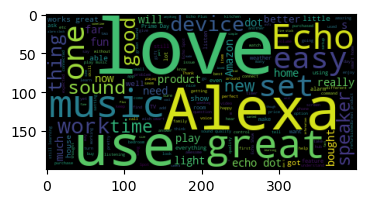

In [16]:
# plotting wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(4,4))
plt.imshow(WordCloud().generate(positive_sen_onestring))

In [17]:
#Converting all reviews to list format
negative_sen=amazon_negative["verified_reviews"].tolist()
print(len(negative_sen))
#Converting list to single large string
negative_sen_onestring="".join(negative_sen)

257


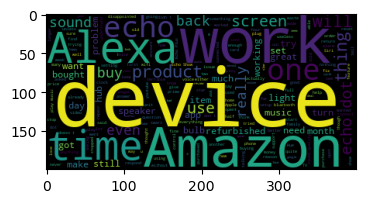

In [18]:
# plotting wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(4,4))
plt.imshow(WordCloud().generate(negative_sen_onestring))

#### STEP 4: 

In [19]:
import nltk # Natural Language tool kit 

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
#Creating a data pipeline to (1) Remove punctuation  (2) Remove Stopwords

def clean_review(review):
    #Removing punctuation
    review_punc_removed=[char for char in review if char not in string.punctuation]
    review_punc_removed_join="".join(review_punc_removed)
    #Removing Stopwords
    review_punc_removed_join_cleaned=[word for word in review_punc_removed_join.split()if word.lower() not in stopwords.words("english")]
    return review_punc_removed_join_cleaned

In [22]:
amazon_df_cleaned=amazon_df["verified_reviews"].apply(clean_review)

In [23]:
amazon_df_cleaned.head()

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
Name: verified_reviews, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = clean_review)
reviews_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [25]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\Beyond\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
reviews_countvectorizer.shape

(3150, 5211)

In [28]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [29]:
X = reviews
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = amazon_df['feedback']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

#### STEP 05:

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
#Using Naive Bayes

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

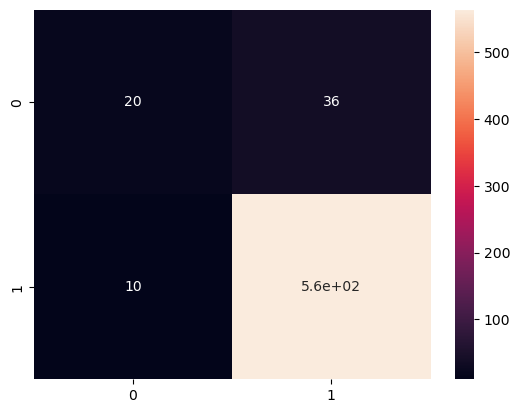

In [34]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        56
           1       0.94      0.98      0.96       574

    accuracy                           0.93       630
   macro avg       0.80      0.67      0.71       630
weighted avg       0.92      0.93      0.92       630



              precision    recall  f1-score   support

           0       0.81      0.30      0.44        56
           1       0.94      0.99      0.96       574

    accuracy                           0.93       630
   macro avg       0.87      0.65      0.70       630
weighted avg       0.92      0.93      0.92       630



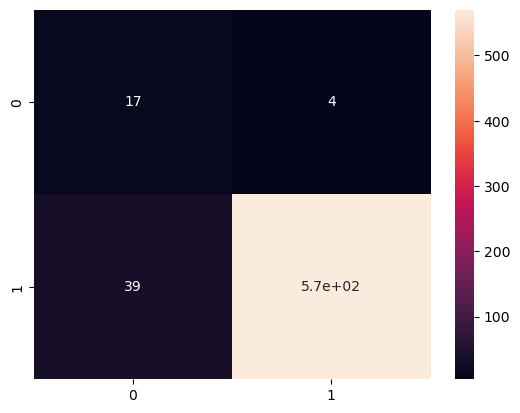

In [36]:
# Using LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.12      0.22        56
           1       0.92      1.00      0.96       574

    accuracy                           0.92       630
   macro avg       0.85      0.56      0.59       630
weighted avg       0.91      0.92      0.89       630



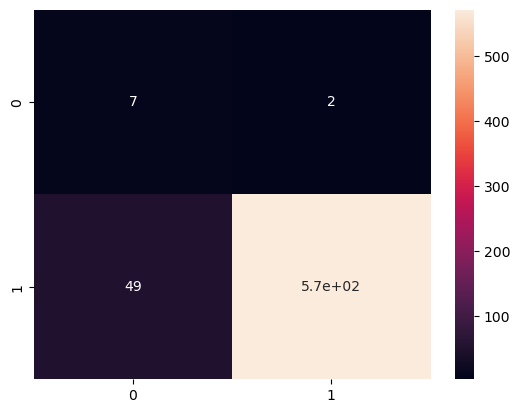

In [37]:
#Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))